In [1]:
#import relevant libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import pickle
import functions as fn

import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
#open sarima prediction objects from modelling notebook
with open('pred_20zipcodes.pickle', 'rb') as f:
    top20forecast = pickle.load(f)

In [3]:
zillow_updated_df = pd.read_csv('Zip_Zhvi_SingleFamilyResidence.csv', encoding='ISO-8859-1')

In [4]:
#get names for columns with only descriptive information
cols_info = list(zillow_updated_df.columns[:7])

In [5]:
#melt overall dataframe
melt_df = fn.df_melt(zillow_updated_df, cols_info)

In [6]:
#retrieve 20 zipcodes selected from prophet model
with open('forcast_returns_sorted.pickle', 'rb') as f:
    top20returns = pickle.load(f)

In [7]:
top20returns.transpose()

,14,11,12,9,10,1,7,19,6,4,3,18,15,13,17,5,16,8,0,2
zipcode,29405.000000,30032.000000,30288.00000,66102.000000,89030.00000,33805.000000,33069.000000,33023.000000,33705.00000,33830.000000,33313.000000,33020.000000,32744.000000,37210.000000,32117.00000,33064.000000,48237.000000,33713.000000,32905.000000,34207.000000
Pred_ann_returns,0.213978,0.194591,0.18316,0.154313,0.15308,0.141429,0.134203,0.122174,0.12168,0.121049,0.117741,0.114196,0.113842,0.108787,0.10776,0.105848,0.102017,0.100178,0.096734,0.064434


In [8]:
#create dictionary with from dataframe
top20returns_dict = dict(zip(top20returns['zipcode'], top20returns['Pred_ann_returns']))

In [10]:
#top20returns_dict

In [11]:
#get only zipcodes for the top 20 
top20zip = list(top20returns['zipcode'])


In [13]:
#extract data series for each zipcode and store in dictionary from melted dataframe
top20_df = {}

for zipcode in top20zip:
    ts_df = melt_df.loc[melt_df['RegionName']==zipcode][['time', 'value']]
    ts_df.set_index('time', inplace=True)
    
    top20_df[zipcode] = ts_df

In [14]:
#get city, state, metro information for top 20 zipcodes
top20_zip_info = {}

for zipcode in top20zip:
    top20_zip_info[zipcode] = fn.retrieve_zip_info(zillow_updated_df, zipcode, 'RegionName')
    

In [16]:
#top20_zip_info 

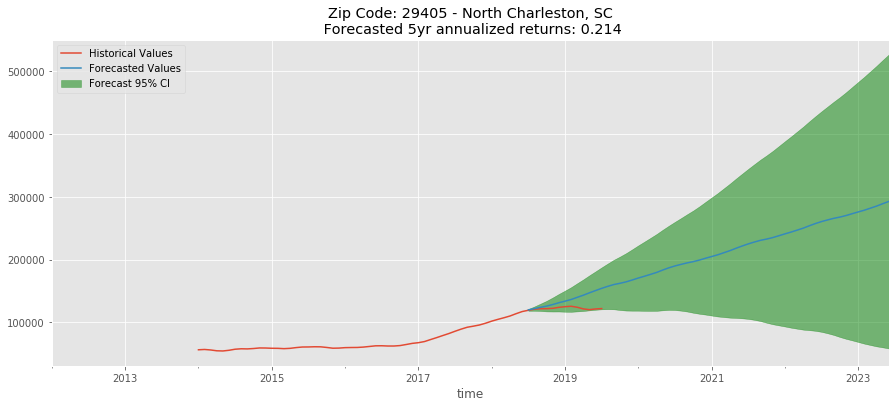

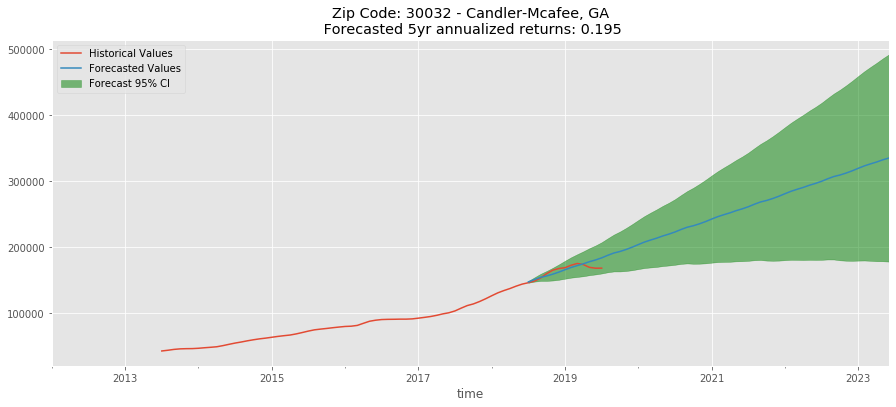

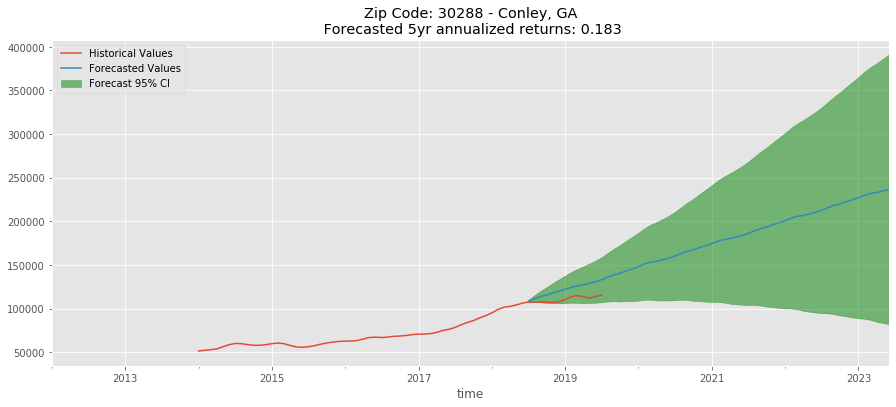

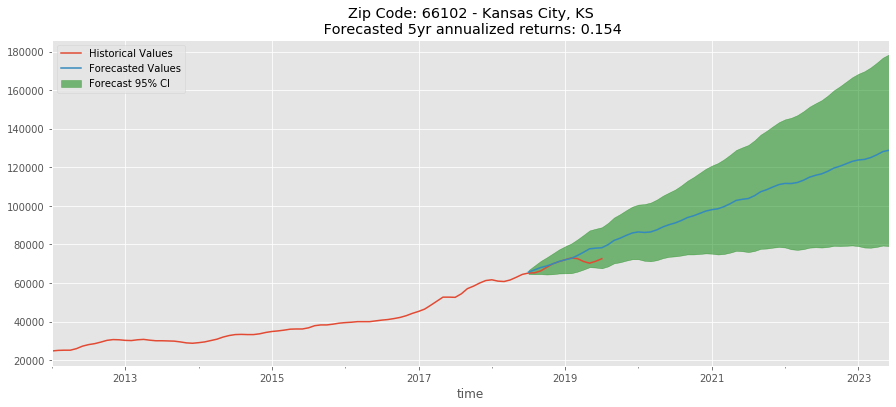

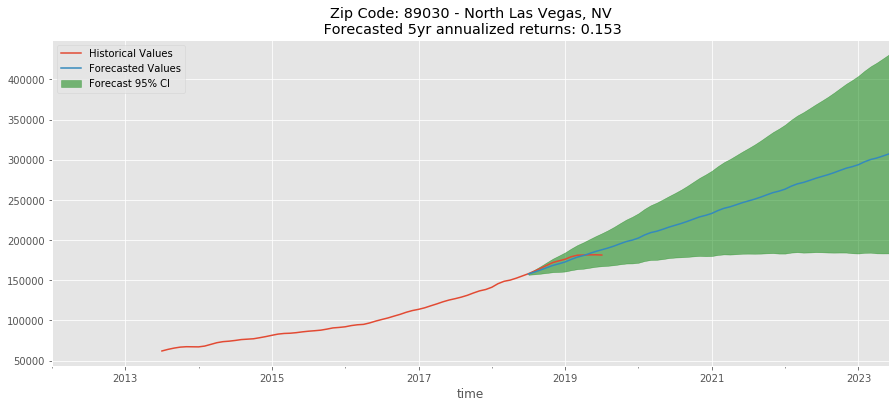

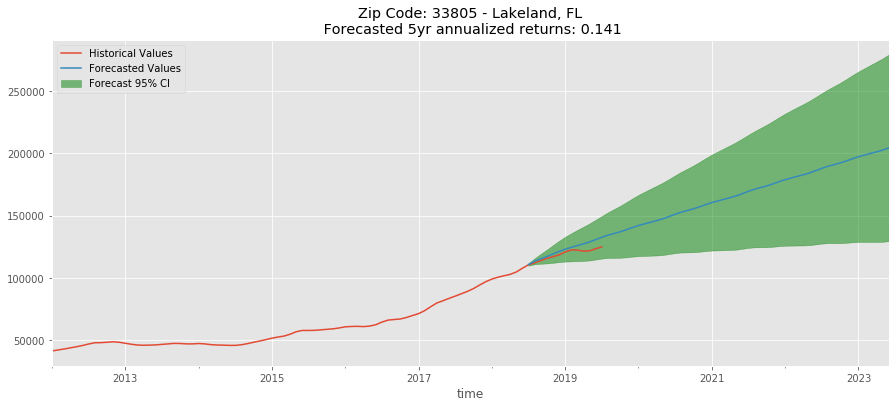

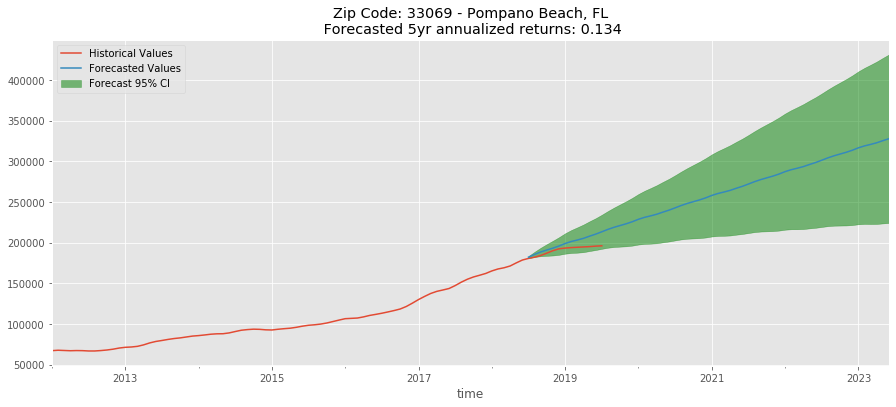

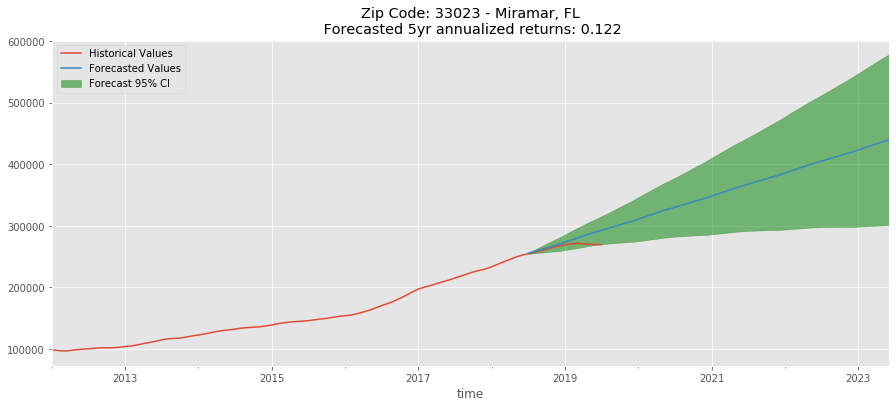

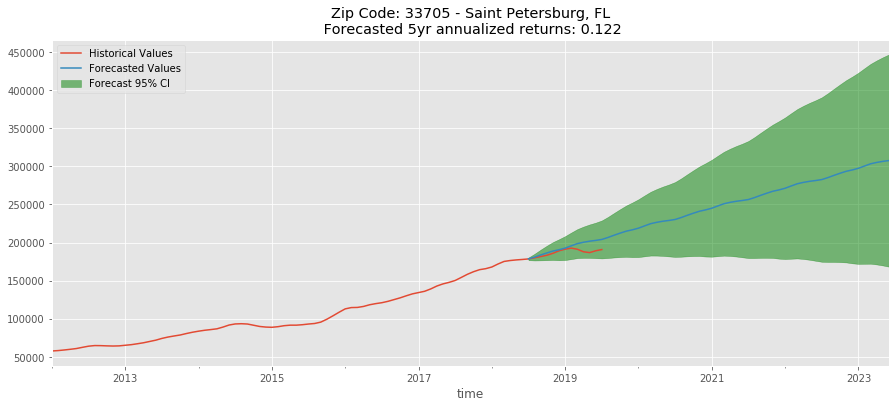

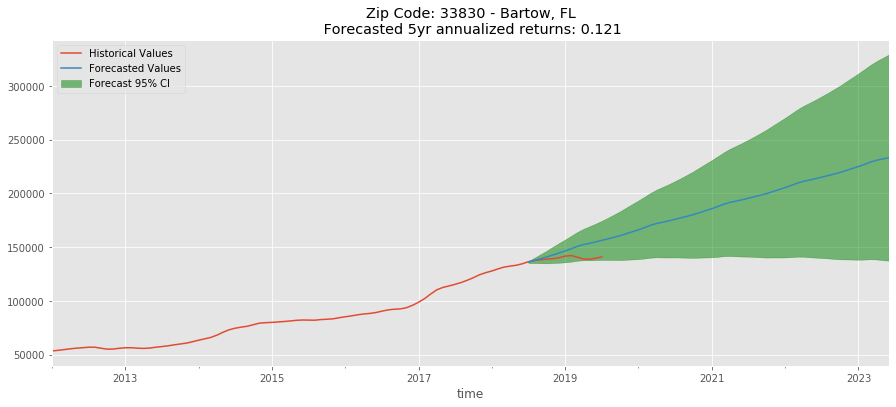

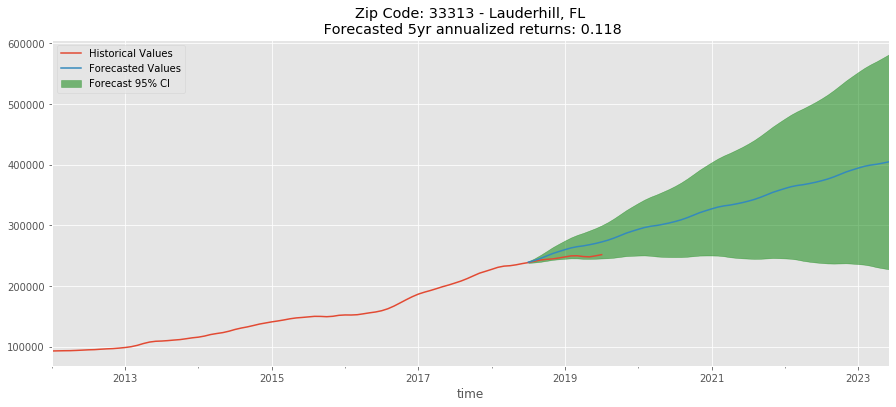

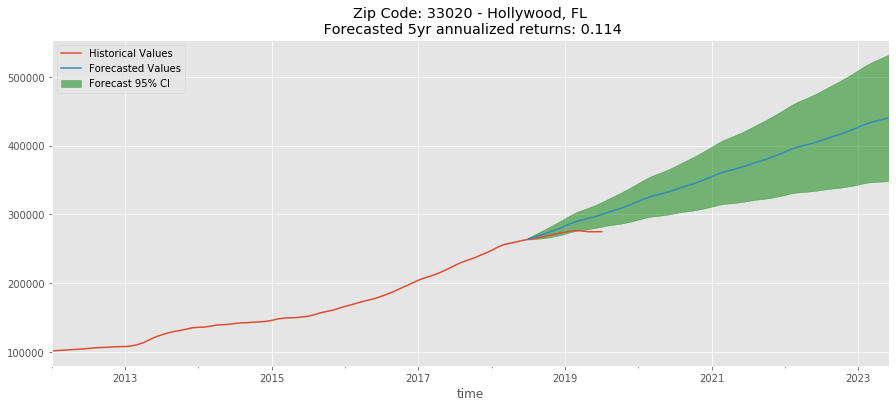

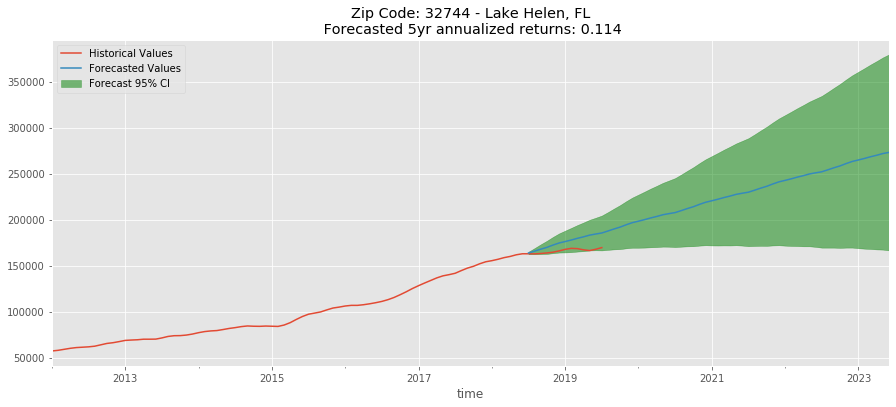

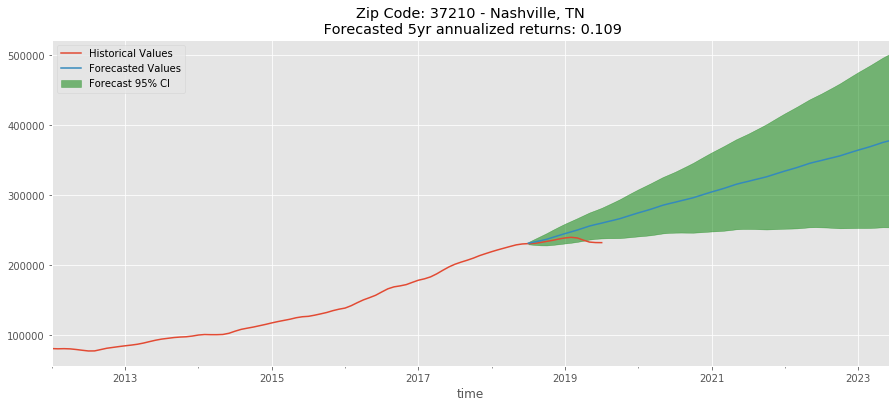

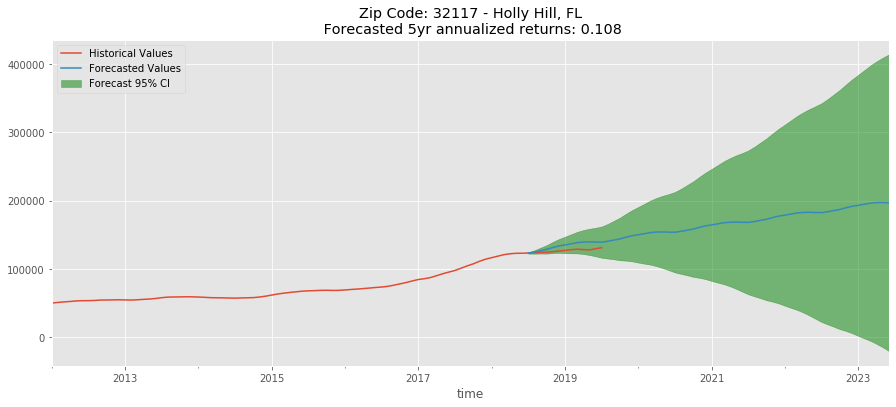

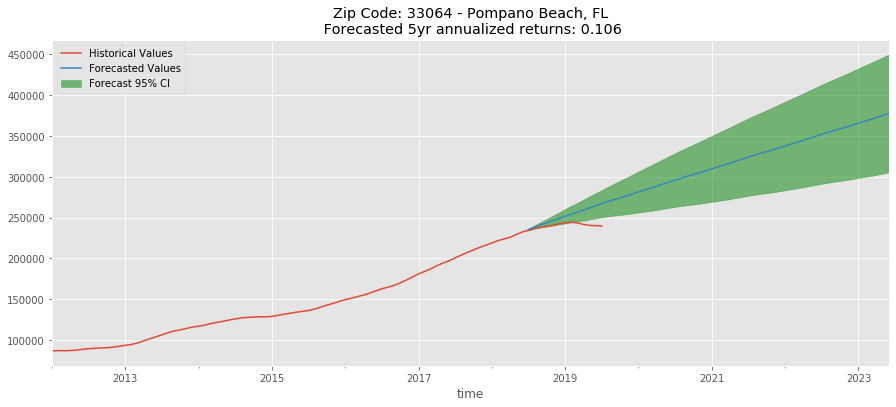

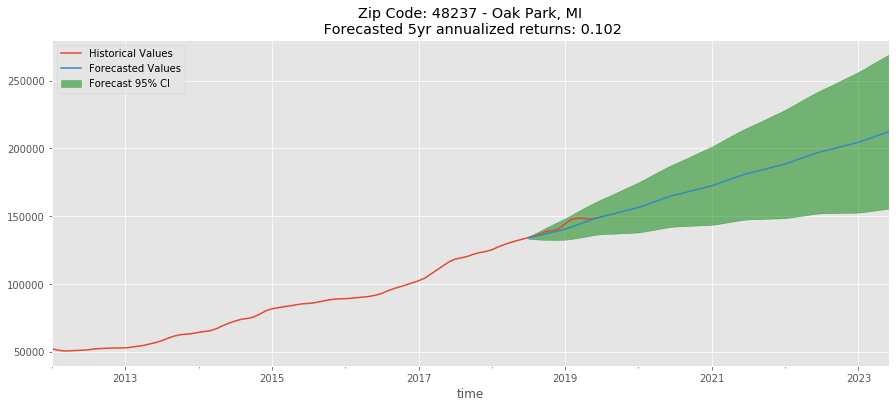

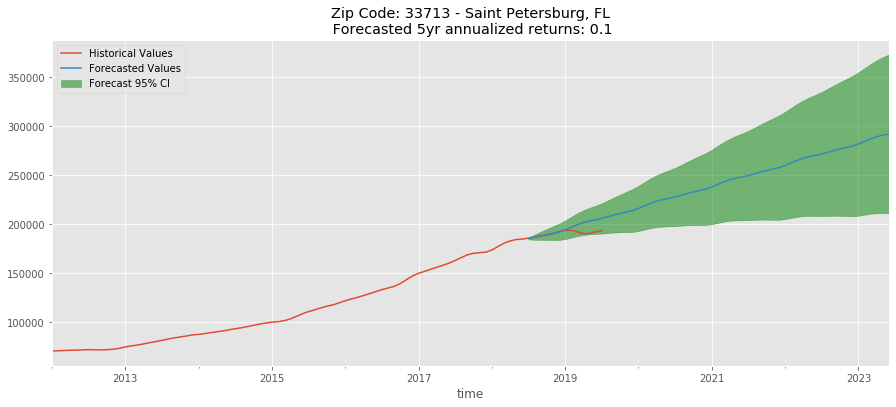

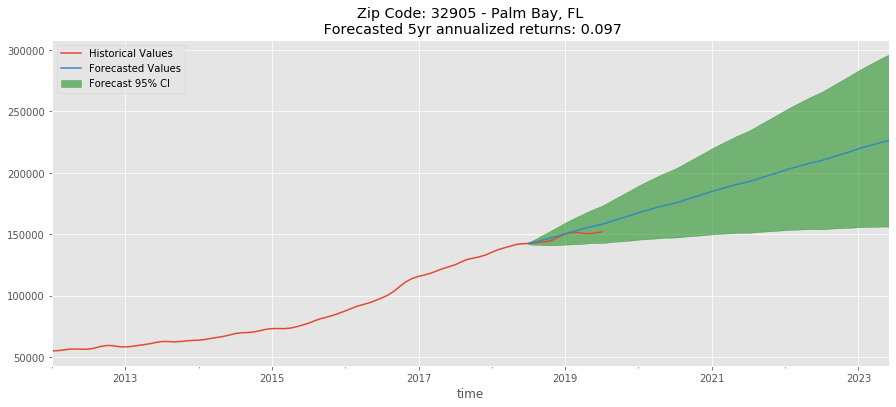

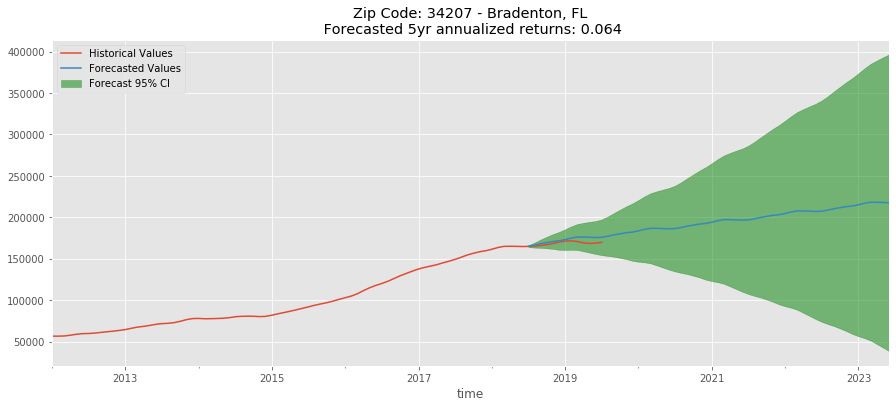

In [27]:
#plot graphs with prediction forecast and confidence intervals
for key in top20_list.keys():
    
    #plot historical values from 2012-01 to 2019-07
    top20_list[key]['2012':].plot(figsize=(15,6), legend=False);
    #plot forecasted values from 2018-06 to 2023-06
    top20forecast[key].predicted_mean.plot();
    
    #plot confidence intervals for forecasted values
    pred_conf = top20forecast[key].conf_int()
    plt.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5);
    
    #create title/subtitle and legends
    roi = str(round(top20returns_dict[key], 3))
    title = ('Zip Code: '+str(key) + ' - ' + top20_zip_info[key][0] + ', ' + top20_zip_info[key][1] + 
             '\n Forecasted 5yr annualized returns: ' + roi)
    
    plt.title(title)
    plt.legend(['Historical Values', 'Forecasted Values', 'Forecast 95% CI'], loc=2 )

In [20]:
#choosing five zipcodes on returns, risk 


#moderate risk profile
#(66102)Kansas City MO, forecast return: 15.4%, size rank - 4246, median price(end 2018) - 71,100???
#(33805)Lakeland FL, forecast return: 14.1%, size rank - 4539, median price(end 2018) - 118,500
#(32905)Palm Bay FL, forecast return: 9.7%, size rank - 3248, median price(end 2018) - 148,000
#(48327)Oak Park MI, forecast return: 10.2% size rank - 2821, median price(end 2018) - $140,700
#(30032)Candler-Mcafee GA, forecast return 19.5%, size rank - 868, median price(end 2018) - 168,200
#(89030)North Las Vegas, forecast return: 15.3%, size rank - 2037, median price(end 2018) - 181,400

#high risk profile
#(29405)North Charleston SC, forecast return: 21.4%, size rank - 4300, median price(end 2018) - 124,100
#(33313)Lauderhill FL, forecast return: 11.4%, size rank - 288, median price(end 2018) - 251,600
#(30288)Conley GA, forecast return: 18.3%, size rank - 9517, median price(end 2018) - 115,600


In [31]:
#zillow_updated_df.loc[zillow_updated_df['RegionName']==32905]

In [29]:
#plot 
melt_df = melt_df.dropna(subset=['value'])
agg_df = melt_df.groupby('time').aggregate({'value':'mean'})

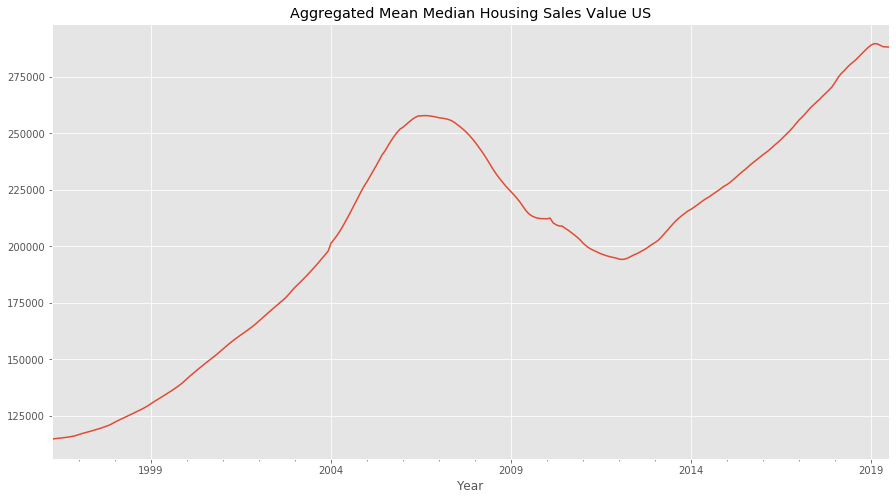

In [30]:
#plot aggregate historical values for whole dataset
agg_df.plot(figsize=(15,8), legend=False)
plt.title("Aggregated Mean Median Housing Sales Value US")
plt.xlabel("Median")
plt.xlabel("Year")
plt.show()